In [816]:
import numpy as np
import pandera as pa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import unicodedata
import re
from datetime import datetime
%matplotlib inline


In [817]:

fn = "boat_data.csv"
d = pd.read_csv(fn,encoding="utf-8")
d.info()
d.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [818]:
display(d.sample(5))

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
2321,EUR 197000,Motor Yacht,Bavaria power boats,"Used boat,Diesel",2016,10.94,3.31,GRP,Germany Â» Allert marin - Ausstellung,101
5031,EUR 235000,Flybridge,Storebro power boats,"Used boat,Diesel",2005,12.50,3.90,GRP,Portugal Â» Lisbon,124
4731,EUR 285000,Flybridge,Azimut power boats,"Used boat,Diesel",2008,13.00,4.22,NaN,Italy Â» Friuli Venezia Giulia Â» Friuli Venez...,77
3492,EUR 1750000,Flybridge,Absolute power boats,"Used boat,Diesel",2017,21.60,5.60,NaN,Greece Â» Griechenland,81
9832,CHF 6990,Fishing Boat,Motocraft power boats,new boat from stock,2020,4.70,1.90,Aluminium,Switzerland Â» Romanel,243


In [819]:
print(d.shape)

(9888, 10)


In [820]:
def only_ascii(text,special=False):
    # keep only ASCII characters (0-127)
    if special: # save the pound sign as GBP
        text = text.replace("£","GBP")
        text = text.replace('Â»','|')
    x = ''.join(c if ord(c)<128 else " " for c in text)
    while True:
        x = x.replace("  "," ")
        x = x.replace(" ,",",")
        x = x.replace(' "','"')
        x = x.replace('" ','"')
        if x.find("  ")==-1:
            break
    x = x.strip()
    return x

In [821]:

# this is a temporary file such that it is easier to debug if something goes wrong
fn2= fn.replace(".csv", "_ascii.csv")

# Read input file
text = None
with open(fn, "r", encoding="utf-8") as f:
    lines = [line.rstrip("\r\n") for line in f if line.rstrip("\r\n")]
    text = "\n".join(lines)
    # clean the non-ASCII characters
    r = [only_ascii(e,special=True) for e in lines]


with open(fn2, "w", encoding="latin1") as f:
    f.writelines([e+"\n" for e in r])



In [822]:

# now pandas can read the file
d = pd.read_csv(fn2,encoding="latin1")


In [823]:
print(d.shape)

(9888, 10)


In [824]:
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland | Lake Geneva | V senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany | B nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland | Lake of Zurich | St fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark | Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany | Bayern | M nchen,58


In [825]:
d.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [826]:
x = d["Price"].str.partition(" ")
d["Currency"] = x[0]
d["Price"] = x[2].astype(int)

In [827]:
def euro(price,currency):
    if currency=='EUR':
        return price
    elif currency=='CHF':
        return int(price) * 1.06
    elif currency=='DKK':
        return int(price) * 0.13
    elif currency=='GBP':
        return int(price) * 1.17

In [828]:
d["Euro"] = d.apply(lambda x: euro(x["Price"], x["Currency"]), axis=1)

In [829]:
d.sample(5)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Euro
2470,240000,Motor Yacht,Atlantis power boats,"Used boat,Diesel",2011,11.90,3.90,NaN,Italy | Tirreno,51,EUR,240000.0
1851,115000,Motor Yacht,B n teau power boats,Used boat,2019,9.00,2.95,NaN,Germany | IM VORLAUF,204,EUR,115000.0
9304,21300,Sport Boat,Karnic power boats,"new boat from stock,Unleaded",2020,5.65,2.30,GRP,Switzerland | Lake of Zurich | Altendorf,289,CHF,22578.0
8787,31000,"Cabin Boat,Motor Yacht,Sport Boat",Crownline power boats,"Used boat,Unleaded",1999,8.89,3.15,GRP,Croatia (Hrvatska) | Rab,502,EUR,31000.0
2339,199000,Flybridge,B n teau power boats,"Used boat,Diesel",2011,13.50,4.09,PVC,"France | SAINT LAURENT DU VAR, SAINT LAURENT D...",59,EUR,199000.0


In [830]:
# see the histogram for the years
YEAR_COL = "Year Built"
d[YEAR_COL].value_counts().sort_index()

# for the year built use the min year - 10 where is NaN 
m = min([e for e in d[YEAR_COL] if e and e!=0])
m2 = m - 10

current_year = datetime.now().year
d[YEAR_COL]=d[YEAR_COL].apply(lambda x: x if m <=x and x <= current_year else m2)

d[YEAR_COL].value_counts().sort_index()


Year Built
1875     551
1885       1
1889       1
1895       1
1897       1
        ... 
2017     314
2018     351
2019     663
2020    1279
2021      53
Name: count, Length: 122, dtype: int64

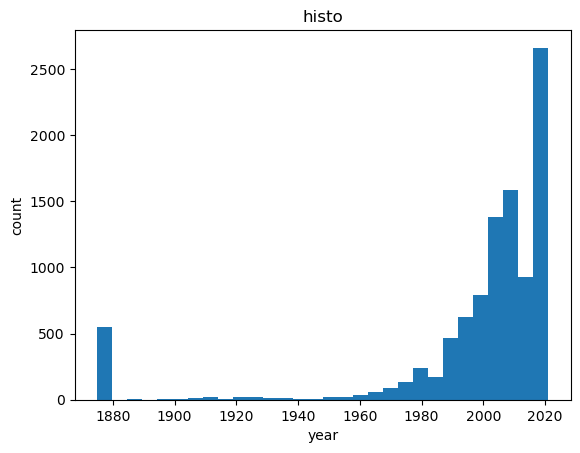

In [831]:

d[YEAR_COL].plot.hist(bins=30)
plt.xlabel("year")
plt.ylabel("count")
plt.title("histo")
plt.show()

In [832]:
d[YEAR_COL].value_counts().sort_index()

Year Built
1875     551
1885       1
1889       1
1895       1
1897       1
        ... 
2017     314
2018     351
2019     663
2020    1279
2021      53
Name: count, Length: 122, dtype: int64

In [833]:
#Split Location to 
x = d['Location'].str.split("|",n=1,expand=True)
d['Country'] =x[0].str.rstrip()
d['City'] = x[1].str.rstrip() 
d.drop(columns=['Location'], inplace=True)
x


,0,1
0,Switzerland,Lake Geneva | V senaz
1,Germany,B nningstedt
2,Switzerland,Lake of Zurich | St fa ZH
3,Denmark,Svendborg
4,Germany,Bayern | M nchen
...,...,...
9883,Switzerland,Lago Maggiore | Riazzino
9884,Germany,Hamburg | HAMBURG
9885,Germany,Nordrhein-Westfalen | Wesel
9886,Italy,Dormelletto


In [834]:
display(d.sample(5))


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Currency,Euro,Country,City
2105,149500,Motor Yacht,Sarnico power boats,Used boat,1998,16.70,4.38,GRP,83,EUR,149500.00,Netherlands,None
9807,7999,"Cabin Boat,Fishing Boat,Sport Boat",Rio power boats,"Used boat,Unleaded",1996,5.50,2.00,Plastic,1049,CHF,8478.94,Switzerland,2545 Selzach
9034,25950,Sport Boat,Quicksilver (Brunswick Marine) power boats,new boat from stock,2019,5.02,2.12,NaN,35,EUR,25950.00,Germany,Ausstellungshalle Schweich
64,6500,Sport Boat,Invader power boats,"Used boat,Unleaded",1991,4.50,2.10,GRP,324,EUR,6500.00,Austria,Werfenweng
8328,41000,Motor Yacht,Cranchi power boats,"Used boat,Diesel",1999,9.69,3.07,GRP,51,EUR,41000.00,Italy,Liguria | Liguria


In [835]:
d["Country"].unique()

array(['Switzerland', 'Germany', 'Denmark', 'Italy', 'France',
       'United Kingdom', 'Spain', 'Austria', 'Netherlands', 'Slovenia',
       'Serbia', 'Belgium', 'Slovak Republic', 'Croatia (Hrvatska)',
       'Portugal', 'Malta', 'Montenegro', 'Latvia', 'Rovinij',
       'Steinwiesen', 'Greece', 'Rolle', 'Poland', 'baden baden', 'Donau',
       'Travem nde', 'Lake Constance', 'Turkey', 'Stralsund', 'Rostock',
       'Lake Geneva', 'Split', 'Finland', 'lago maggiore', 'Belgi, Zulte',
       'Niederrhein', 'Hungary', 'Brandenburg an derHavel', 'R gen',
       'Zevenbergen', 'Oder', 'Cyprus', 'Faoug', 'Beilngries',
       'Czech Republic', 'Sweden', 'Lithuania', 'United States',
       'Marina Punat', 'Ukraine', 'French Southern Territories',
       'Italien', 'Brandenburg', nan, 'Estonia', 'Monaco',
       'Russian Federation', 'waren m ritz', 'Egypt', 'Jersey',
       'United Arab Emirates', 'Australia', 'Bulgaria', 'Philippines',
       'Taiwan', 'Thailand', 'Luxembourg', 'Venezuela'

In [836]:
d["Country"] = d["Country"].astype(str).str.strip().str.lower()

In [837]:
replace_country = {
    # Valid countries (normalized)
    "switzerland": "Switzerland",
    "germany": "Germany",
    "denmark": "Denmark",
    "italy": "Italy",
    "france": "France",
    "united kingdom": "United Kingdom",
    "spain": "Spain",
    "austria": "Austria",
    "netherlands": "Netherlands",
    "slovenia": "Slovenia",
    "serbia": "Serbia",
    "slovakia": "Slovakia",
    "croatia": "Croatia",
    "portugal": "Portugal",
    "malta": "Malta",
    "montenegro": "Montenegro",
    "latvia": "Latvia",
    "greece": "Greece",
    "poland": "Poland",
    "turkey": "Turkey",
    "finland": "Finland",
    "hungary": "Hungary",
    "cyprus": "Cyprus",
    "czech republic": "Czech Republic",
    "sweden": "Sweden",
    "lithuania": "Lithuania",
    "united states": "United States",
    "ukraine": "Ukraine",
    "estonia": "Estonia",
    "monaco": "Monaco",
    "russia": "Russia",
    "egypt": "Egypt",
    "united arab emirates": "United Arab Emirates",
    "australia": "Australia",
    "bulgaria": "Bulgaria",
    "philippines": "Philippines",
    "taiwan": "Taiwan",
    "thailand": "Thailand",
    "luxembourg": "Luxembourg",
    "venezuela": "Venezuela",
    "ireland": "Ireland",
    "norway": "Norway",
    "seychelles": "Seychelles",
    "morocco": "Morocco",
    "lebanon": "Lebanon",
    "romania": "Romania",

    # Localized or typo versions of countries
    "italien": "Italy",
    "italie": "Italy",
    "dalmatien": "Croatia",
    "kroatien krk": "Croatia",
    "espa?a": "Spain",

    # Cities/regions mapped to countries
    "steinwiesen": "Germany",
    "rolle": "Switzerland",
    "baden baden": "Germany",
    "lake constance": "Germany",
    "split": "Croatia",
    "lago maggiore": "Italy",
    "brandenburg an derhavel": "Germany",
    "zevenbergen": "Netherlands",
    "faoug": "Switzerland",
    "martinique": "France",
    "gibraltar": "United Kingdom",
    "mallorca": "Spain",
    "opwijk": "Belgium",
    "isle of man": "United Kingdom",
    "neusiedl am see": "Austria",
    "bodensee": "Germany",
    "avenches": "Switzerland",
    "heilbronn": "Germany",
    "z richse, 8855 wangen sz": "Switzerland",
    "ibiza": "Spain",
    "lommel": "Belgium",
    "wijdenes": "Netherlands",
    "bremen": "Germany",
    "bielefeld": "Germany",
    "porto rotondo": "Italy",
    "berlin wannsee": "Germany",
    "toscana": "Italy",
    "vierwaldst ttersee - buochs": "Switzerland",
    "juelsminde havn": "Denmark",
    "barssel": "Germany",
    "welschenrohr": "Switzerland",
    "thun": "Switzerland",
    "adria": "Italy",
    "rovinij": "Croatia",                            # city in Croatia
    "donau": "Germany",                              # Danube river (German name)
    "travem nde": "Germany",                         # typo for Travemünde, Germany
    "stralsund": "Germany",                          # city in Germany
    "rostock": "Germany",                            # city in Germany
    "lake geneva": "Switzerland",                    # lake on Swiss–French border
    "belgi, zulte": "Belgium",                       # town in Belgium
    "niederrhein": "Germany",                        # region in Germany
    "r gen": "Germany",                              # typo for Rügen island
    "oder": "Germany",                               # river
    "beilngries": "Germany",                         # town in Bavaria
    "marina punat": "Croatia",                       # marina on Krk island
    "french southern territories": "France",         # overseas territory
    "brandenburg": "Germany",                        # state in Germany
    "nan": "None",                                # NaN entry
    "waren m ritz": "Germany",                       # Waren (Müritz), town in Germany
    "jersey": "United Kingdom",                      # British crown dependency
    "neustadt in holstein (ostsee)": "Germany",      # town in northern Germany
    "ostsee": "Germany",                             # Baltic Sea (German name)
    "greetsile/ krummh rn": "Germany",               # Greetsiel / Krummhörn, Lower Saxony
    "annecy": "France",                              # city in France
    "izola": "Slovenia",                             # coastal town
    "83278 traunstein": "Germany",                   # German town (postal code)
    "novi vinodolski": "Croatia",                    # coastal town
    "lago di garda": "Italy",                        # lake in northern Italy
    "nordseek ste": "Germany",                       # typo for Nordseeküste (North Sea coast)
    "24782 b delsdorf": "Germany",                   # Büdelsdorf, Germany
    "pt stkysten ellers esbjerg": "Denmark",         # likely Esbjerg (coastal Denmark)
    "calanova mallorca": "Spain",                    # marina in Mallorca
    "katwijk": "Netherlands",                        # coastal town
    "tenero, lago maggiore": "Switzerland",          # lakeside town
    "fu ach": "Austria",                             # typo for Fußach, Austria
    "angera": "Italy",                               # lakeside town
    "lago maggiore, minusio": "Switzerland",         # lakeside town
    "thalwil": "Switzerland",                        # suburb of Zürich
    "rheinfelden": "Germany"                         # could also be Switzerland, but likely German side
}





In [838]:
d["Country"] = d["Country"].replace(replace_country)
d["Country"].unique()

array(['Switzerland', 'Germany', 'Denmark', 'Italy', 'France',
       'United Kingdom', 'Spain', 'Austria', 'Netherlands', 'Slovenia',
       'Serbia', 'belgium', 'slovak republic', 'croatia (hrvatska)',
       'Portugal', 'Malta', 'Montenegro', 'Latvia', 'Croatia', 'Greece',
       'Poland', 'Turkey', 'Finland', 'Belgium', 'Hungary', 'Cyprus',
       'Czech Republic', 'Sweden', 'Lithuania', 'United States',
       'Ukraine', 'None', 'Estonia', 'Monaco', 'russian federation',
       'Egypt', 'United Arab Emirates', 'Australia', 'Bulgaria',
       'Philippines', 'Taiwan', 'Thailand', 'Luxembourg', 'Venezuela',
       'Ireland', 'Norway', 'Seychelles', 'Morocco', 'Lebanon', 'Romania'],
      dtype=object)

In [839]:
d.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
Currency                          0
Euro                              0
Country                           0
City                            943
dtype: int64

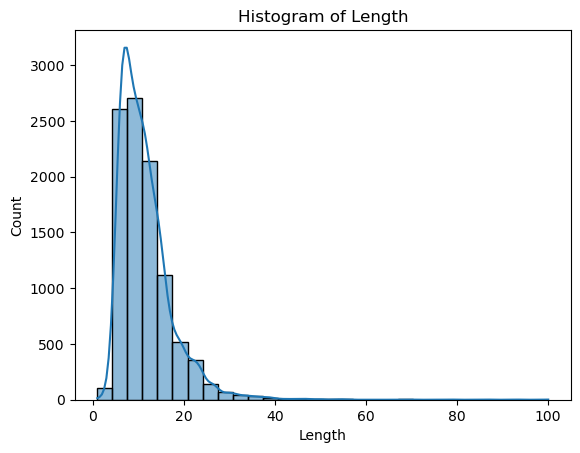

In [840]:
# Length - processing
sns.histplot(data=d, x="Length", bins=30, kde=True)
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Histogram of Length")
plt.show()

In [841]:
d['Length'] = d['Length'].fillna(0)


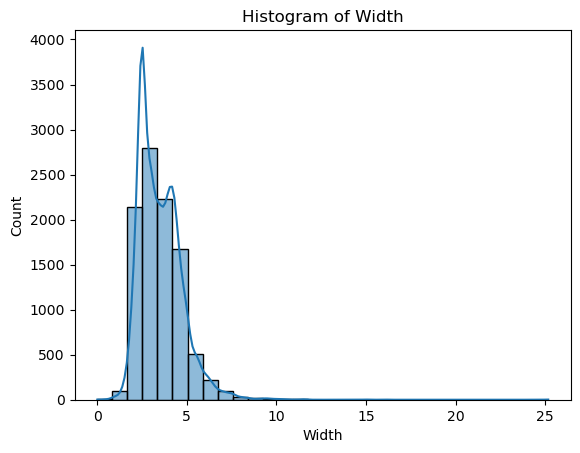

In [842]:
# Width - processing
sns.histplot(data=d, x="Width", bins=30, kde=True)
plt.xlabel("Width")
plt.ylabel("Count")
plt.title("Histogram of Width")
plt.show()

In [843]:
d['Width'] = d['Width'].fillna(0)

In [844]:
d.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
Currency                          0
Euro                              0
Country                           0
City                            943
dtype: int64

In [845]:
d['Type'] =d["Type"].fillna('None')

In [846]:
d.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
Currency                          0
Euro                              0
Country                           0
City                            943
dtype: int64

In [847]:
d["Type"].unique()

array(['new boat from stock', 'Used boat,Unleaded', 'Used boat',
       'Used boat,Electric', 'new boat from stock,Unleaded',
       'Used boat,Diesel', 'new boat on order', 'Unleaded',
       'new boat on order,Unleaded', 'new boat from stock,Gas', 'Diesel',
       'Display Model,Unleaded', 'Display Model', 'None', 'Used boat,Gas',
       'new boat from stock,Diesel', 'new boat from stock,Electric',
       'new boat on order,Diesel', 'new boat from stock,Hybrid',
       'Display Model,Diesel', 'Used boat,Hybrid', 'Display Model,Gas',
       'Display Model,Electric', 'Electric', 'Used boat,Propane'],
      dtype=object)

In [848]:
x = d["Type"].tolist()
x

['new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'Used boat,Unleaded',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'Used boat,Electric',
 'new boat from stock',
 'Used boat',
 'new boat from stock',
 'Used boat,Unleaded',
 'new boat from stock,Unleaded',
 'new boat from stock',
 'Used boat',
 'Used boat,Diesel',
 'Used boat,Unleaded',
 'new boat from stock',
 'new boat from stock,Unleaded',
 'new boat from stock,Unleaded',
 'Used boat,Unleaded',
 'Used boat',
 'Used boat,Unleaded',
 'Used boat,Unleaded',
 'new boat from stock',
 'Used boat,Unleaded',
 'new boat from stock',
 'Used boat',
 'Used boat,Unleaded',
 'new boat on order',
 'new boat from stock',
 'Used boat,Unleaded',
 'Used boat,Unleaded',
 'Used boat,Unleaded',
 'new boat on order',
 'Used boat,Unleaded',
 'Used boat,Unleaded',
 'Used boat,Unleaded',
 'new boat from stock',
 'new boat from stock',
 'new boat fr

In [849]:
x = [e.partition(",") for e in x]
x

[('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('Used boat', ',', 'Unleaded'),
 ('Used boat', '', ''),
 ('new boat from stock', '', ''),
 ('new boat from stock', '', ''),
 ('Used boat', ',', 'Electric'),
 ('new boat from stock', '', ''),
 ('Used boat', '', ''),
 ('new boat from stock', '', ''),
 ('Used boat', ',', 'Unleaded'),
 ('new boat from stock', ',', 'Unleaded'),
 ('new boat from stock', '', ''),
 ('Used boat', '', ''),
 ('Used boat', ',', 'Diesel'),
 ('Used boat', ',', 'Unleaded'),
 ('new boat from stock', '', ''),
 ('new boat from stock', ',', 'Unleaded'),
 ('new boat from stock', ',', 'Unleaded'),
 ('Used boat', ',', 'Unleaded'),
 ('Used boat', '', ''),
 ('Used boat', ',', 'Unleaded'),
 ('Used boat', ',', 'Unleaded'),
 ('new boat from stock', '', ''),
 ('Used boat', ',', 'Unleaded'),
 ('new boat from stock', '', ''),
 ('U

In [850]:
power = [e[2] if e[2] else 'None' for e in x]
power

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Unleaded',
 'None',
 'None',
 'None',
 'Electric',
 'None',
 'None',
 'None',
 'Unleaded',
 'Unleaded',
 'None',
 'None',
 'Diesel',
 'Unleaded',
 'None',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'None',
 'Unleaded',
 'Unleaded',
 'None',
 'Unleaded',
 'None',
 'None',
 'Unleaded',
 'None',
 'None',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'None',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'None',
 'None',
 'None',
 'Unleaded',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Unleaded',
 'Unleaded',
 'None',
 'None',
 'None',
 'None',
 'Unleaded',
 'None',
 'Unleaded',
 'Diesel',
 'None',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'None',
 'None',
 'Unleaded',
 'Unleaded',
 'None',
 'Unleaded',
 'Unleaded',
 'None',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'Diesel',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'Unleaded',
 'None',
 'None',
 'Unleaded',
 'None',
 'None',
 'Unleaded',
 'Unleaded',
 'N

In [851]:
x = [e[0] for e in x]
x

['new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'new boat from stock',
 'Used boat',
 'new boat from stock',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'Used boat',
 'Used boat',
 'new boat from stock',
 'Used boat',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'new boat on order',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'Used boat',
 'new boat on order',
 'Used boat',
 'Used boat',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'Used boat',
 'Used boat',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'new boat from stock',
 'Used boat',
 'Used

In [852]:
d["Type"]=x

In [853]:
d["Power"]=power

In [854]:
d.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
Currency                          0
Euro                              0
Country                           0
City                            943
Power                             0
dtype: int64

In [855]:
d['Manufacturer']=d['Manufacturer'].fillna('None')

In [856]:
d.isna().sum()


Price                             0
Boat Type                         0
Manufacturer                      0
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
Currency                          0
Euro                              0
Country                           0
City                            943
Power                             0
dtype: int64

In [857]:
d["Material"].value_counts().sort_index()

Material
Aluminium               229
Carbon Fiber             30
GRP                    5484
Hypalon                   5
PVC                    1123
Plastic                  77
Reinforced concrete       1
Rubber                    1
Steel                   939
Thermoplastic            15
Wood                    235
Name: count, dtype: int64

In [858]:
d['Material']=d['Material'].fillna('None')
d['City']=d['City'].fillna('None')
d['Country']=d['Country'].fillna('None')

In [859]:
d.isna().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
Currency                       0
Euro                           0
Country                        0
City                           0
Power                          0
dtype: int64

In [860]:
d.dtypes

Price                            int64
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
Currency                        object
Euro                           float64
Country                         object
City                            object
Power                           object
dtype: object

# Exploratory Data Analysis (EDA)

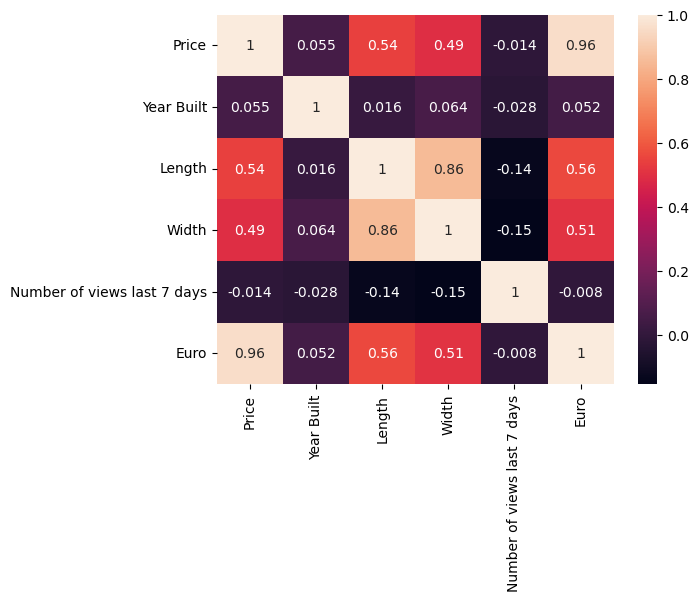

In [861]:
# correlations
corr = d.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

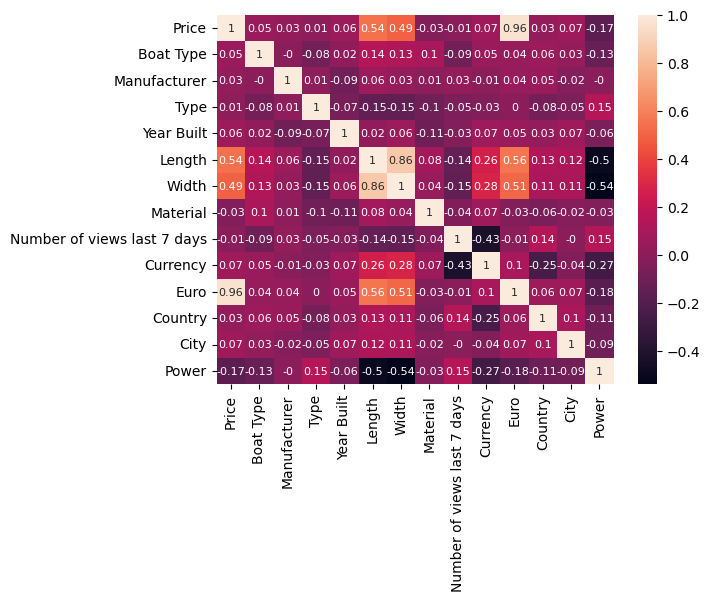

In [ ]:
# correlation matrix when the categorical variables are encoded
d_encoded = d.copy()
for col in d.select_dtypes(include='object'):
    d_encoded[col] = d[col].astype('category').cat.codes

corr = d_encoded.corr().round(2)
sns.heatmap(corr, annot=True,annot_kws={"size": 8})
plt.show()

In [863]:
d.isna().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
Currency                       0
Euro                           0
Country                        0
City                           0
Power                          0
dtype: int64

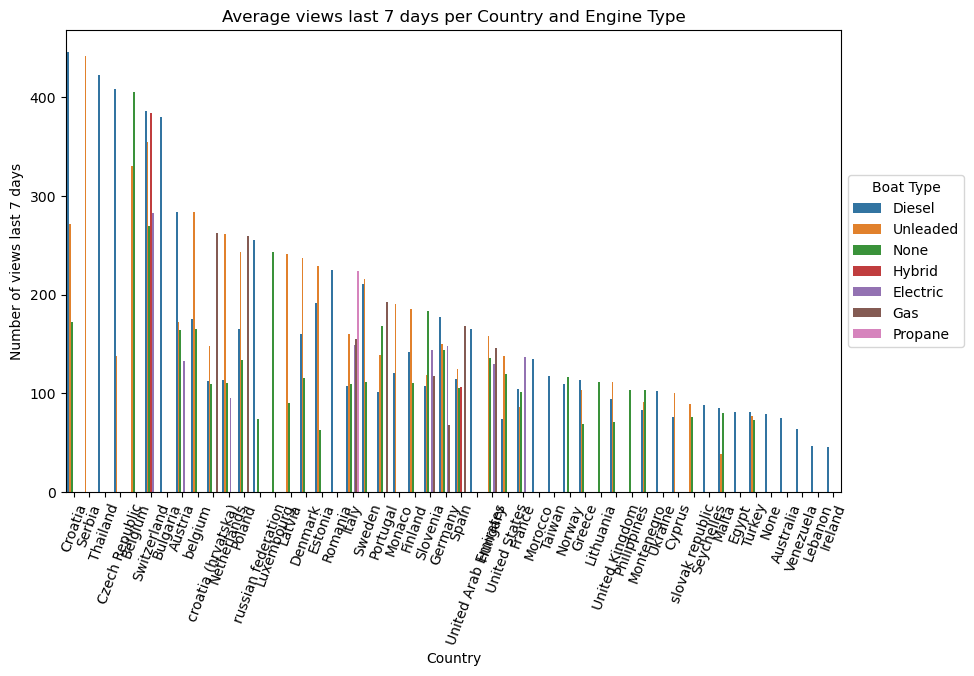

In [866]:
fig = plt.figure(figsize=(10,6) )
Country_View= d.groupby(['Country','Power'])['Number of views last 7 days'].mean().reset_index(drop=False).sort_values(by=['Number of views last 7 days','Country'],ascending=False)
sns.barplot(x='Country', y='Number of views last 7 days',hue='Power', data=Country_View)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
plt.legend(loc = 'center left', bbox_to_anchor=(1,0.5), title = 'Boat Type')

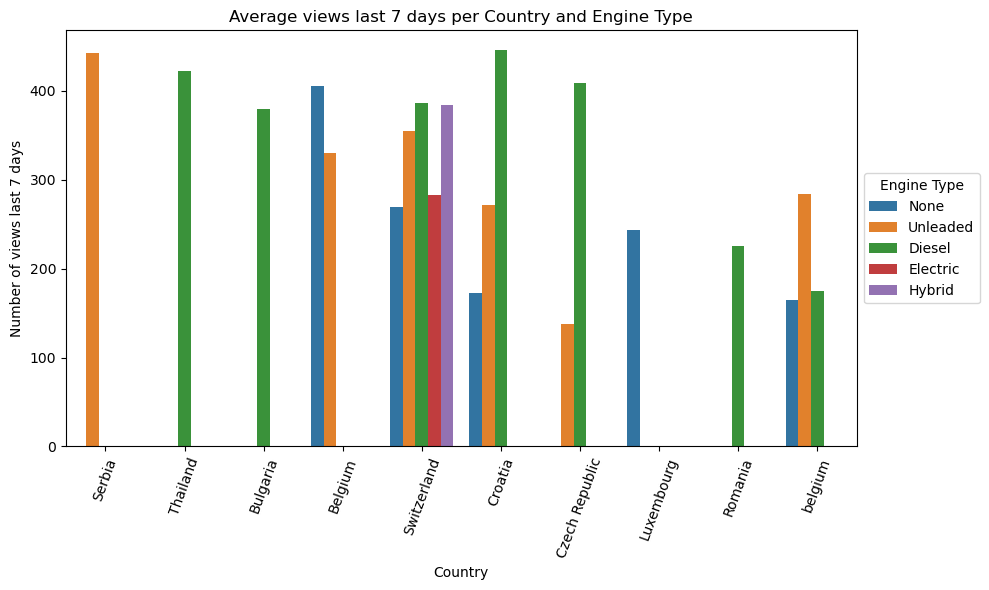

In [867]:
# Compute average views per Country + Power
Country_View = (
    d.groupby(['Country', 'Power'])['Number of views last 7 days']
    .mean()
    .reset_index()
)

# Compute total views per country (ignoring engine type)
top_countries = (
    Country_View.groupby("Country")['Number of views last 7 days']
    .mean()
    .nlargest(10)
    .index
)

# Filter Country_View to include only top 10 countries
Country_View = Country_View[Country_View["Country"].isin(top_countries)]

# Sort by total views (for better display)
Country_View["Country"] = pd.Categorical(
    Country_View["Country"],
    categories=top_countries,
    ordered=True
)

# Plot
fig = plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country',
    y='Number of views last 7 days',
    hue='Power',
    data=Country_View
)
plt.title("Average views last 7 days per Country and Engine Type")
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Engine Type')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average views last 7 days per Material')

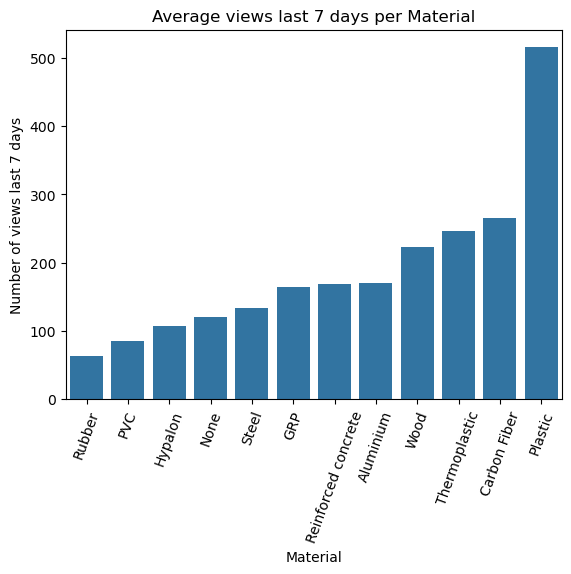

In [871]:
Material_View= d.groupby('Material')['Number of views last 7 days'].mean().sort_values().reset_index(drop=False)


sns.barplot(x='Material', y='Number of views last 7 days', data=Material_View)
plt.xticks(rotation=70)
plt.title("Average views last 7 days per Material")

In [872]:
d.to_csv("validated_boat_data.csv", index=False)